In [1]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.8/78.2 GB disk)


In [2]:
from ultralytics import YOLO

from IPython.display import display, Image

In [7]:
%cd {HOME}


[Errno 2] No such file or directory: '{HOME}'
/content


In [9]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [10]:
%cd {HOME}


/content


In [8]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

NameError: name 'HOME' is not defined

In [12]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="B8FLwD6FBEYxPXwcT2bM")
project = rf.workspace("smart-parking-zos3v").project("smart-parking-0lbad")
version = project.version(2)
dataset = version.download("yolov8-obb")


mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to smart-parking-2 in yolov8-obb:: 100%|██████████| 5608/5608 [00:00<00:00, 7422.61it/s]


In [20]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data=/content/datasets/roboflow/data.yaml epochs=25 imgsz=800 plots=True

/content
Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/roboflow/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, s

/content


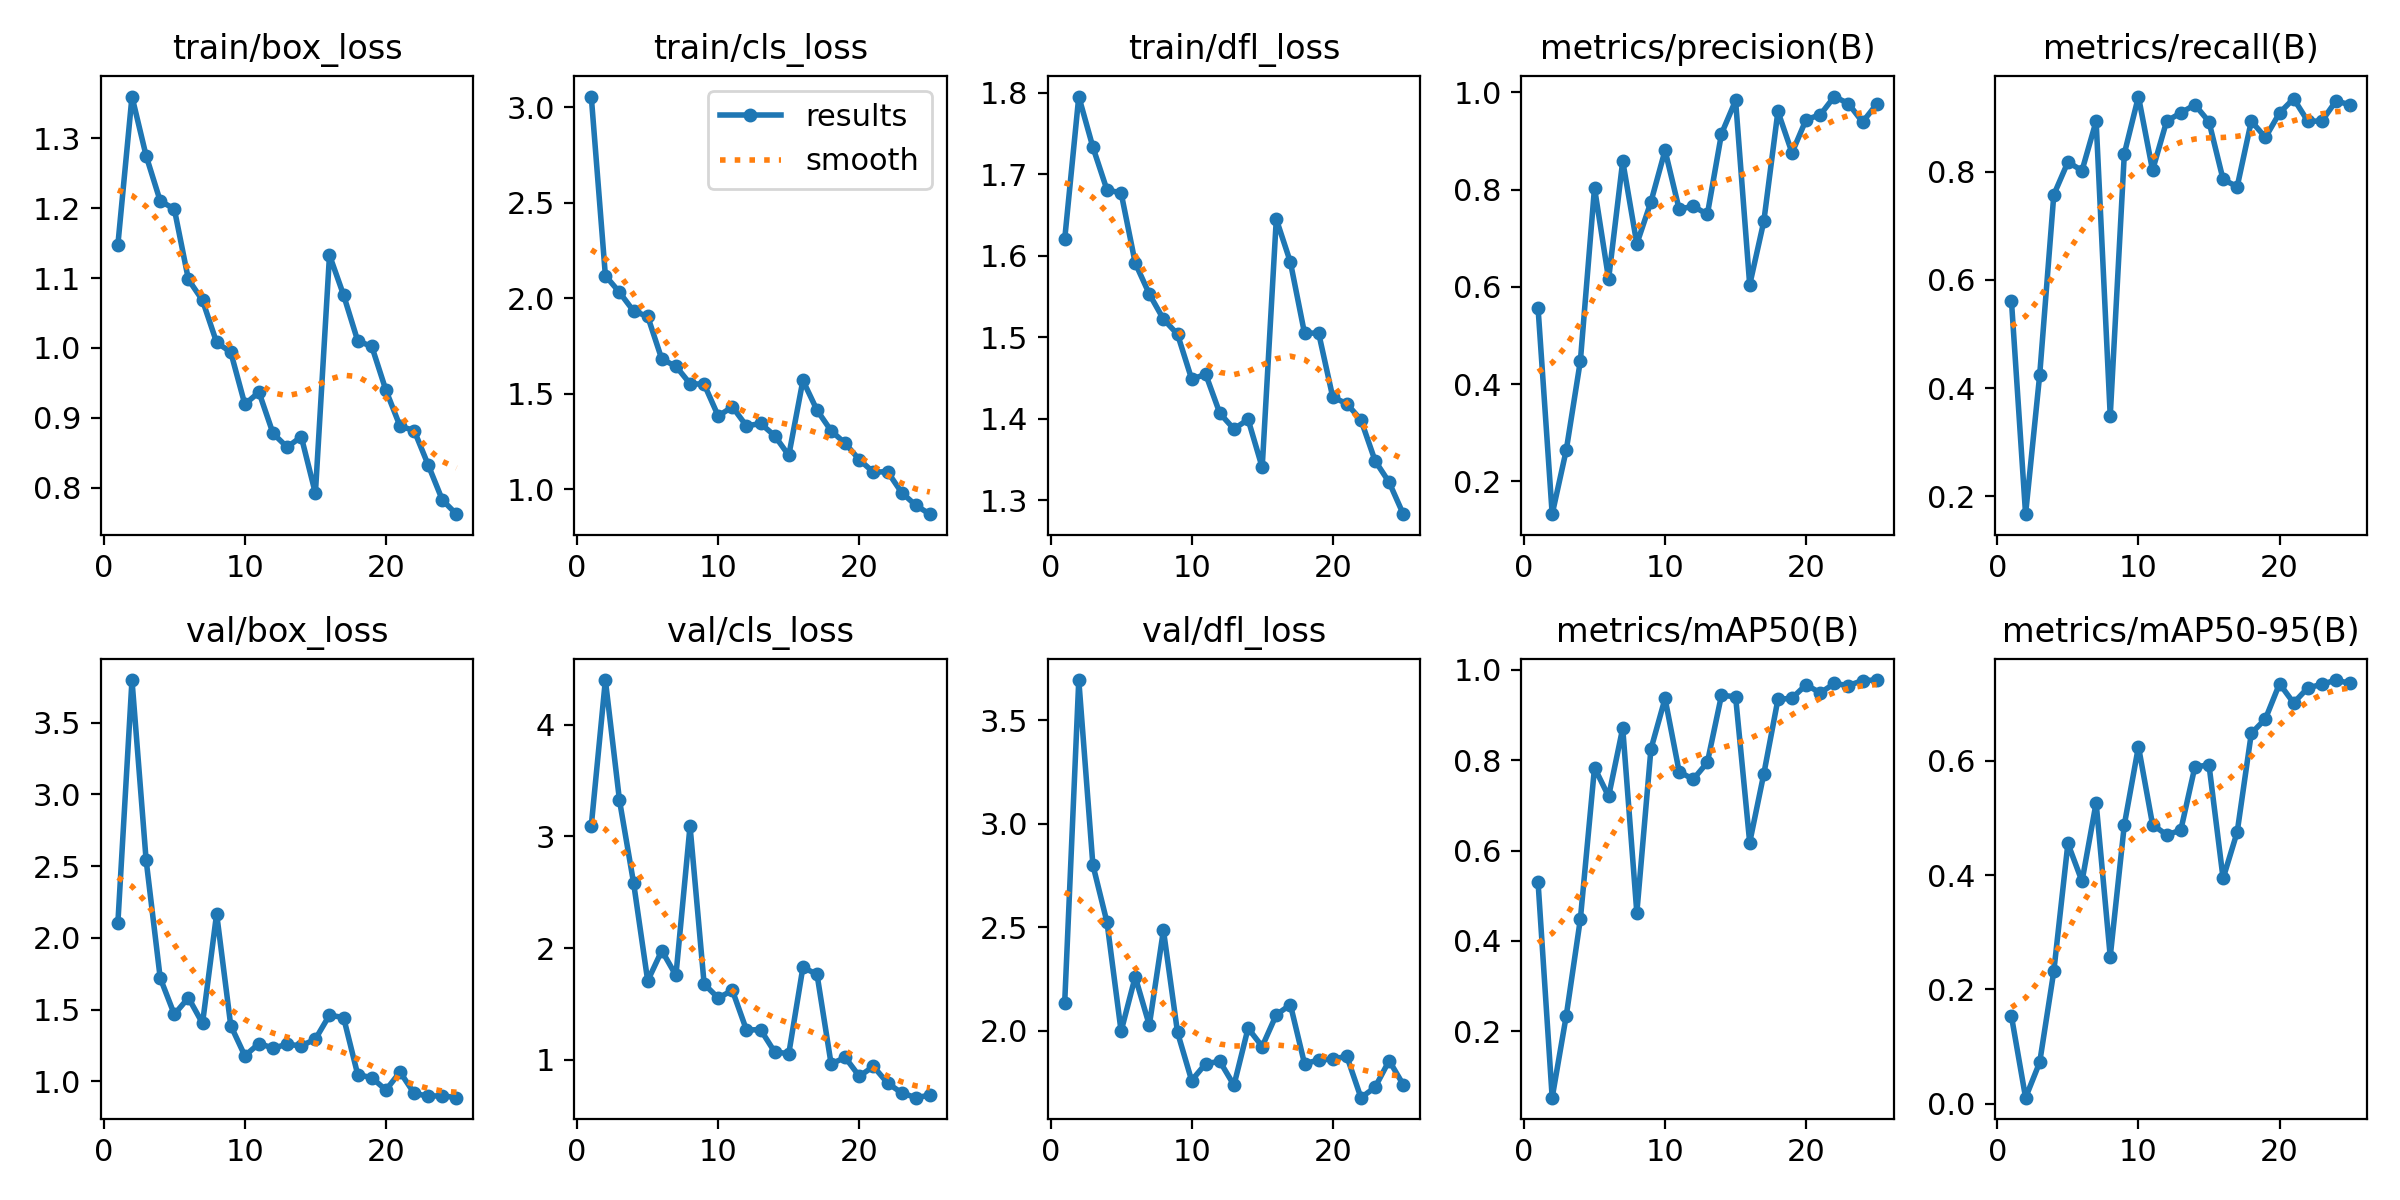

In [24]:
%cd {HOME}
Image(filename=f'/content/runs/detect/train5/results.png', width=600)

In [25]:
!yolo task=detect mode=val model=/content/runs/detect/train5/weights/best.pt data=/content/datasets/roboflow/data.yaml

Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/roboflow/valid/labels.cache... 70 images, 7 backgrounds, 0 corrupt: 100% 70/70 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 5/5 [00:07<00:00,  1.58s/it]
                   all         70         66      0.939      0.931      0.977       0.74
Speed: 4.5ms preprocess, 24.1ms inference, 0.2ms loss, 36.7ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [26]:
!yolo task=detect mode=predict model=/content/runs/detect/train5/weights/best.pt conf=0.25 source=/content/smart-parking-2/test/images save=True

Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/13 /content/smart-parking-2/test/images/-0FB0E465-1451-4618-84CD-1A1A88293B08-png_jpg.rf.99e182d2a0730d50e27cff454e75dab4.jpg: 800x800 (no detections), 22.5ms
image 2/13 /content/smart-parking-2/test/images/-3827C0BE-B55D-4ADE-9938-9DC7D50A32DD-png_jpg.rf.1b7fdd17b61b0a1ada3a231e99034f9b.jpg: 800x800 1 cars, 22.6ms
image 3/13 /content/smart-parking-2/test/images/-41421EB3-10E7-4E8B-9D22-424751A9FE8A-png_jpg.rf.c4da6808ec49bde5bcc443fc237d7b0b.jpg: 800x800 (no detections), 22.5ms
image 4/13 /content/smart-parking-2/test/images/-4B741C2C-6B83-4220-B69F-FCD31BA7BD93-png_jpg.rf.7486d1502e3df51ac82ce16ae84e6097.jpg: 800x800 1 cars, 22.4ms
image 5/13 /content/smart-parking-2/test/images/-531F16FE-7468-484D-8B14-D5229D4851B8-png_jpg.rf.9ad5b7c3ea91b723a2aa75409b646bea.jpg: 800x800 1 cars, 22.4ms
image 6/13 /content/sma

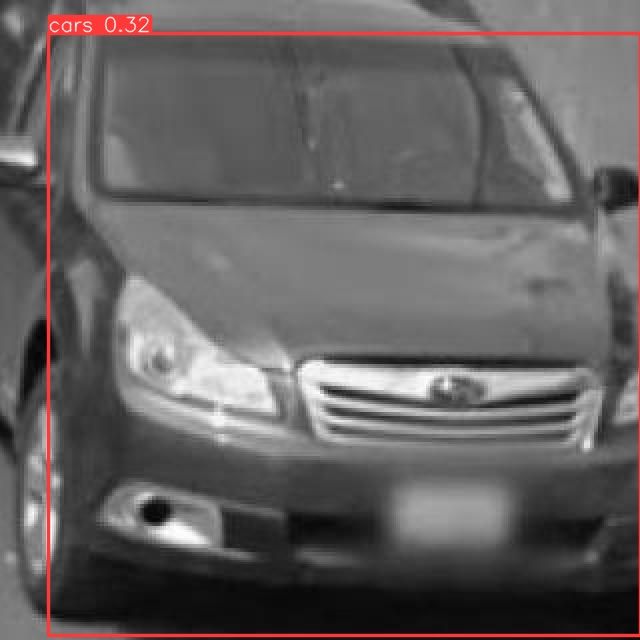

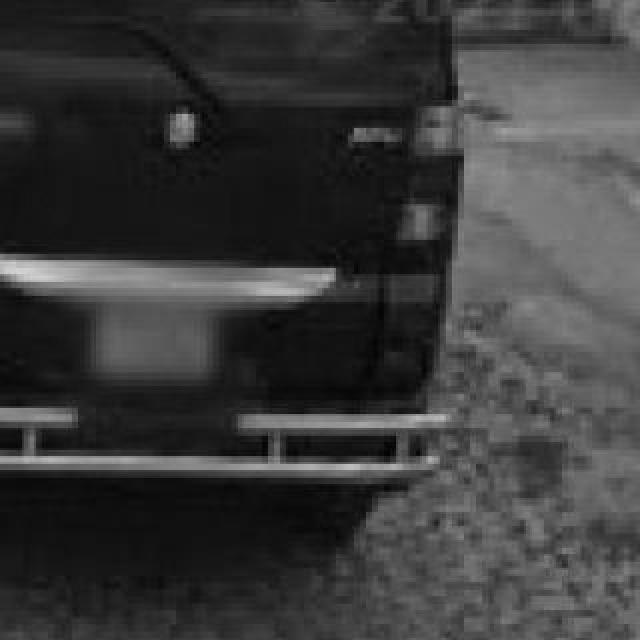

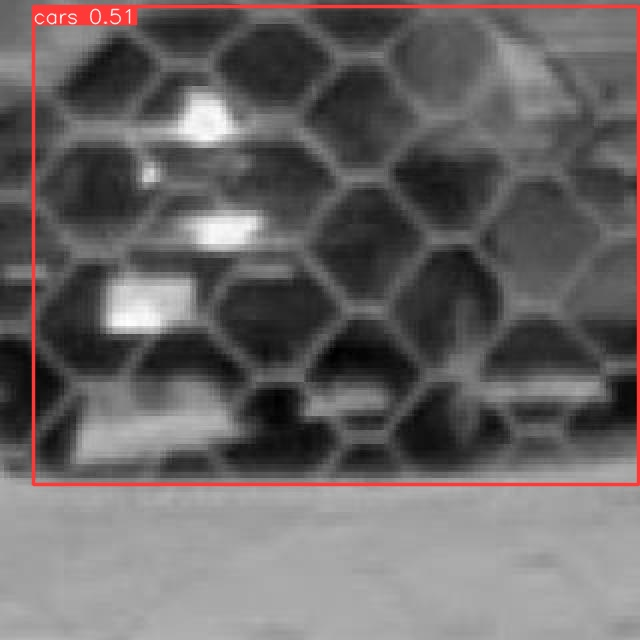

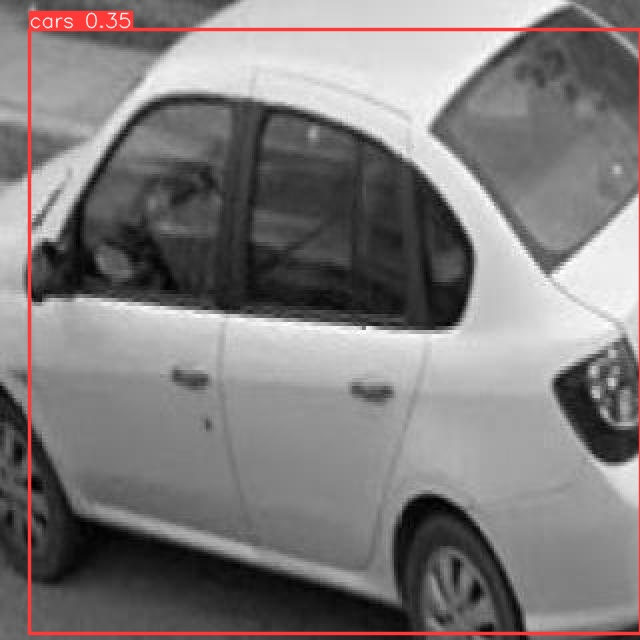

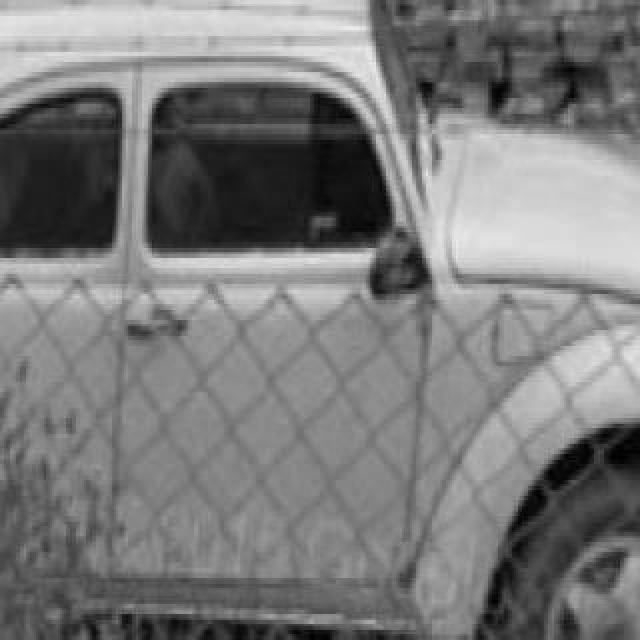

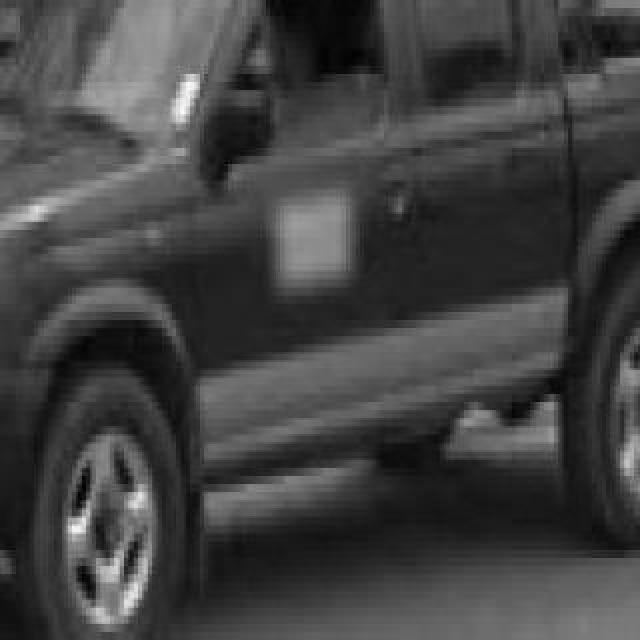

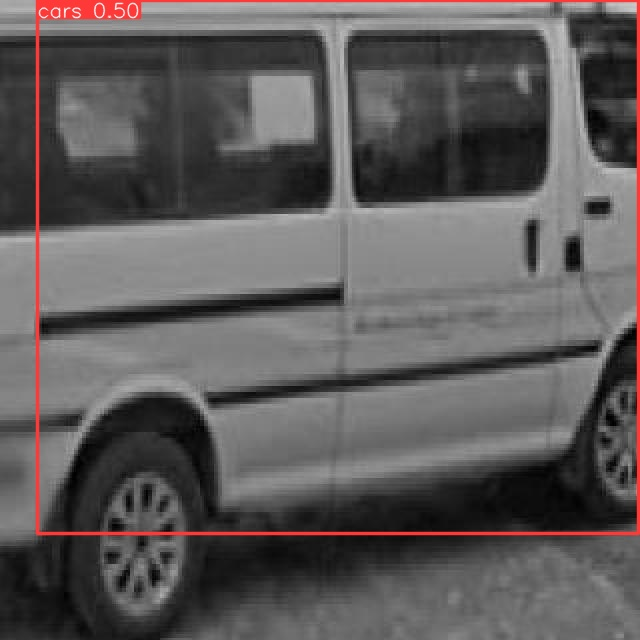

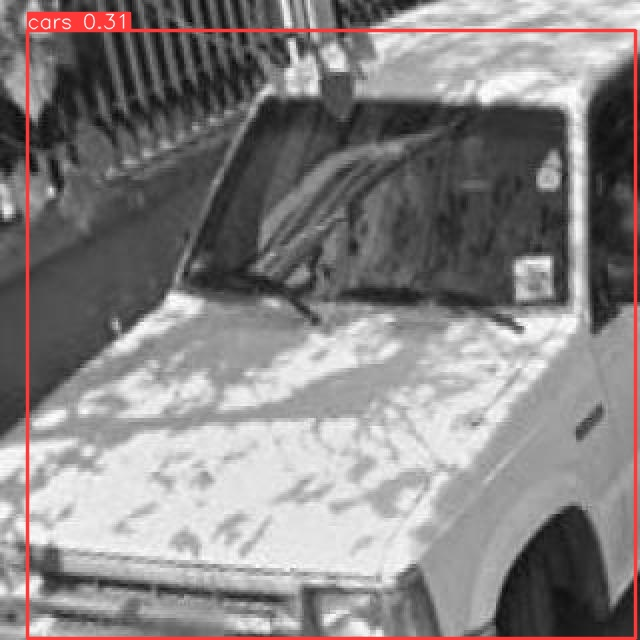

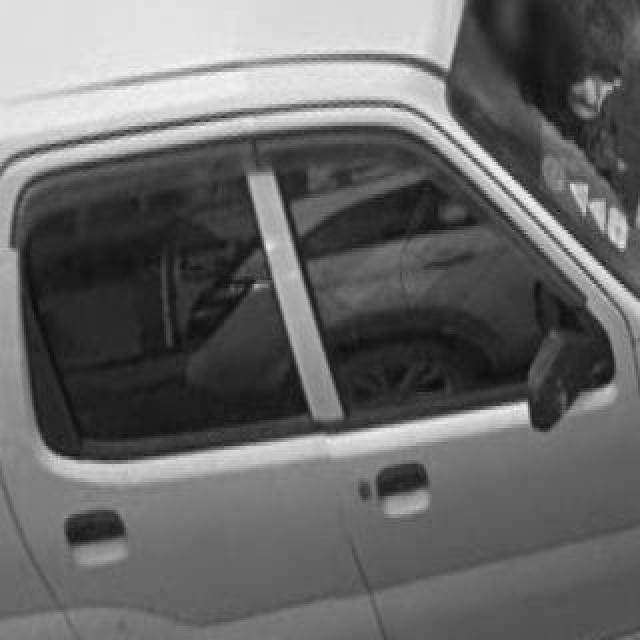

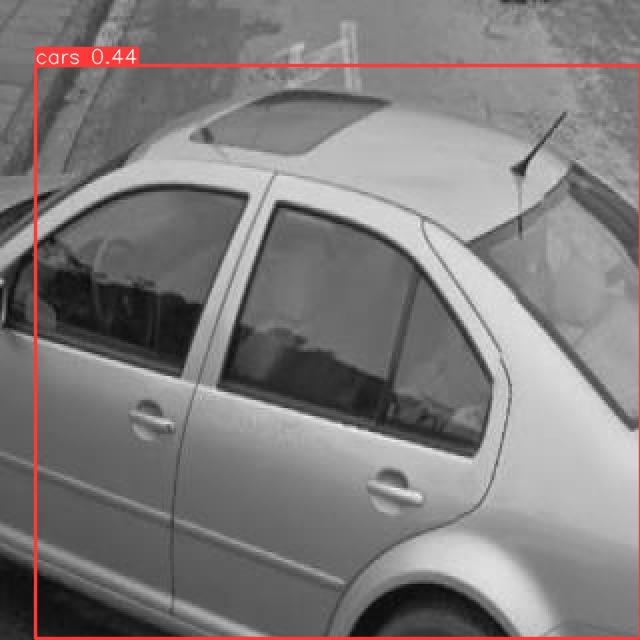

In [33]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg'):
      display(Image(filename=image_path, width=600))
      print("\n")

In [29]:
!zip -r /content/dataset.zip /content/datasets


Streaming output truncated to the last 5000 lines.
  adding: content/datasets/roboflow/train/labels/-B8116B0D-7D32-4C4A-9F5D-D72766C72DB5-png_jpg.rf.fd4ccd92deb60cb87cad3875ad7751cb.txt (deflated 36%)
  adding: content/datasets/roboflow/train/labels/20230222_211611_jpg.rf.42b6491155bfa42ec3eefdb42c59efb1.txt (stored 0%)
  adding: content/datasets/roboflow/train/labels/20230222_211928_jpg.rf.9cf5f78ac28a0167bcbf59b18f8096ae.txt (deflated 57%)
  adding: content/datasets/roboflow/train/labels/-4B733FC3-CEF8-427E-B4A1-7C1E04168672-png_jpg.rf.06bc575cd40bb3eebd7f1f15a94f4430.txt (deflated 39%)
  adding: content/datasets/roboflow/train/labels/img-00249_jpg.rf.c7ed83fff29377f6aa3251e4b7eccb18.txt (stored 0%)
  adding: content/datasets/roboflow/train/labels/img-00206_jpg.rf.beabb9d241aa38a61b089141d50d3e42.txt (stored 0%)
  adding: content/datasets/roboflow/train/labels/img-00220_jpg.rf.488a4f6c780966916ca6e1a9e18b54c0.txt (stored 0%)
  adding: content/datasets/roboflow/train/labels/img-00187_

In [30]:
!zip -r /content/runs.zip /content/runs


  adding: content/runs/ (stored 0%)
  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/train4/ (stored 0%)
  adding: content/runs/detect/train4/weights/ (stored 0%)
  adding: content/runs/detect/train4/args.yaml (deflated 52%)
  adding: content/runs/detect/train2/ (stored 0%)
  adding: content/runs/detect/train2/weights/ (stored 0%)
  adding: content/runs/detect/train2/args.yaml (deflated 52%)
  adding: content/runs/detect/val/ (stored 0%)
  adding: content/runs/detect/val/val_batch1_pred.jpg (deflated 14%)
  adding: content/runs/detect/val/confusion_matrix.png (deflated 39%)
  adding: content/runs/detect/val/val_batch2_labels.jpg (deflated 14%)
  adding: content/runs/detect/val/val_batch1_labels.jpg (deflated 15%)
  adding: content/runs/detect/val/PR_curve.png (deflated 29%)
  adding: content/runs/detect/val/confusion_matrix_normalized.png (deflated 38%)
  adding: content/runs/detect/val/val_batch0_labels.jpg (deflated 13%)
  adding: content/runs/detect/val/R_cur

In [31]:
from google.colab import files
files.download("/content/runs.zip")
files.download("/content/dataset.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>